In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import time
from sklearn import model_selection
from sklearn import metrics
import warnings
import seaborn as sns
sns.set();
plt.style.use('seaborn')
warnings.filterwarnings('ignore')
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel

In [2]:
data = pd.read_excel('./Kaggle_Sirio_Libanes_ICU_Prediction.xlsx')
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 300)

In [3]:
data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

**Imbalanced dataset**

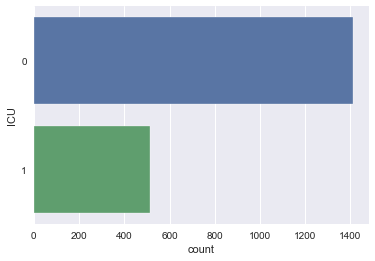

In [4]:
sns.countplot(y=data['ICU'], data=data)

In [5]:
print('ICU: {}, No ICU: {}'.format(len(data.loc[data['ICU'] == 1]), len(data.loc[data['ICU'] == 0])))

ICU: 515, No ICU: 1410


In [6]:
def plot_distribution(title='Age Distribution', df = data['AGE_PERCENTIL'], palette_color = 'Purples'):
    plt.figure(figsize=(12,7))
    plt.title(title, fontsize=14)
    sns.countplot(df, palette=palette_color)
    plt.tight_layout()
    

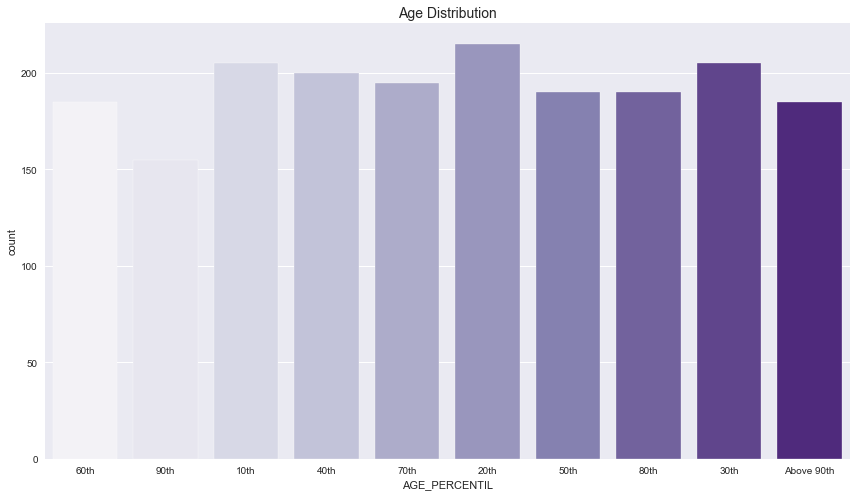

In [7]:
plot_distribution()

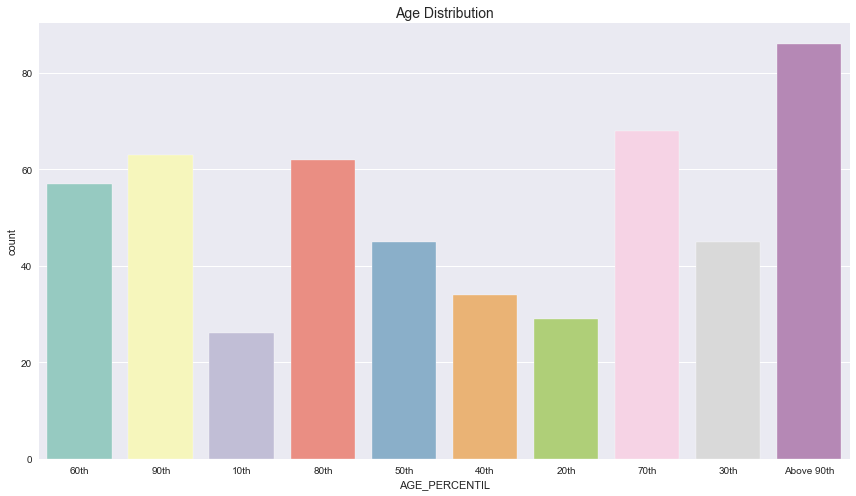

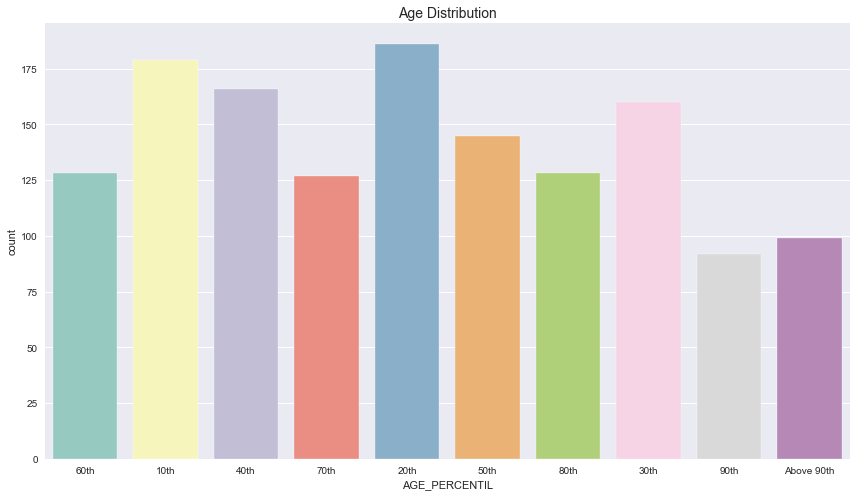

In [8]:
plot_distribution(df=data.loc[(data['ICU'] == 1), 'AGE_PERCENTIL'], palette_color='Set3')
plot_distribution(df=data.loc[(data['ICU'] == 0), 'AGE_PERCENTIL'], palette_color='Set3')

In [9]:
data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [10]:
print(data['DISEASE GROUPING 1'].isnull().sum(), data['DISEASE GROUPING 2'].isnull().sum() , data['DISEASE GROUPING 3'].isnull().sum(),data['DISEASE GROUPING 4'].isnull().sum() , data['DISEASE GROUPING 5'].isnull().sum(),data['DISEASE GROUPING 6'].isnull().sum())


5 5 5 5 5 5


In [11]:
data.dropna(subset=['DISEASE GROUPING 1','DISEASE GROUPING 2','DISEASE GROUPING 3','DISEASE GROUPING 4','DISEASE GROUPING 5','DISEASE GROUPING 6',],axis=0)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Missing Values (NUMERIC)

In [12]:
from sklearn.impute import SimpleImputer
imp_numeric = SimpleImputer(missing_values=np.nan, strategy='mean')
num_cols = data.select_dtypes(exclude='object')

for col in num_cols:
    if data[col].isnull().sum() > 0:
        data[col] = imp_numeric.fit_transform(data[[col]])
    else:
        pass

data[col].isnull().sum()

0

# Missing Values (Categorical)

In [13]:
#percentil = data['AGE_PERCENTIL'].unique()
#percentil

In [14]:
def cat_percentil(percentil):
    if percentil == "Above 90th":
        return(100)
    else:
        return(int("".join(c for c in str(percentil) if c.isdigit())))

In [15]:
cat_cols = data.select_dtypes(include='object')
cat_cols.columns

Index(['AGE_PERCENTIL', 'WINDOW'], dtype='object')

In [16]:
data['AGE_PERCENTIL'] = data['AGE_PERCENTIL'].apply(lambda x: cat_percentil(x))
data['AGE_PERCENTIL'].isnull().sum()

0

In [17]:
cat_cols = data.select_dtypes(include='object')
cat_cols.columns

Index(['WINDOW'], dtype='object')

In [18]:
def cat_window(window):
    if window == "ABOVE_12":
        return(13)
    else:
        return(int((window.split("-")[1])))

In [19]:
data['WINDOW'] = data['WINDOW'].apply(lambda x: cat_window(x))
data['WINDOW'].isnull().sum()

0

In [20]:
# remove ID 
data.drop('PATIENT_VISIT_IDENTIFIER', axis=1, inplace=True)

**As proposed by the clinic is the 0-2 window.**

In [21]:
ICU_60 = len(data.loc[(data['WINDOW'] == 2) & (data['AGE_ABOVE65'] == 1) & (data['ICU'] == 1)])

In [22]:
no_ICU_60 = len(data.loc[(data['WINDOW'] == 2) & (data['AGE_ABOVE65'] == 1) & (data['ICU'] == 0)])

In [23]:
print('The count of paitients with AGE Above 65 and got into the ICU in the first 0-2 Hours is: {}'.format(ICU_60))

The count of paitients with AGE Above 65 and got into the ICU in the first 0-2 Hours is: 19


In [24]:
print('The count of paitients with AGE Above 65 and got into the ICU in the first 0-2 Hours is: {}'.format(no_ICU_60))

The count of paitients with AGE Above 65 and got into the ICU in the first 0-2 Hours is: 161


In [25]:
data.shape

(1925, 230)

# Data is clean now after:
<ul>
    <li>
        Taking the mean over the numeric data.
    </li>
    <li>
        Processing the AGE_PERCENTIL to become an integer.
    </li>
    <li>
        Processing the WINDOW to become an abstract integer.
    </li>
    </ul>

In [26]:
print(data.isnull().sum())

AGE_ABOVE65                         0
AGE_PERCENTIL                       0
GENDER                              0
DISEASE GROUPING 1                  0
DISEASE GROUPING 2                  0
DISEASE GROUPING 3                  0
DISEASE GROUPING 4                  0
DISEASE GROUPING 5                  0
DISEASE GROUPING 6                  0
HTN                                 0
IMMUNOCOMPROMISED                   0
OTHER                               0
ALBUMIN_MEDIAN                      0
ALBUMIN_MEAN                        0
ALBUMIN_MIN                         0
ALBUMIN_MAX                         0
ALBUMIN_DIFF                        0
BE_ARTERIAL_MEDIAN                  0
BE_ARTERIAL_MEAN                    0
BE_ARTERIAL_MIN                     0
BE_ARTERIAL_MAX                     0
BE_ARTERIAL_DIFF                    0
BE_VENOUS_MEDIAN                    0
BE_VENOUS_MEAN                      0
BE_VENOUS_MIN                       0
BE_VENOUS_MAX                       0
BE_VENOUS_DI

In [27]:
data.head()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.528527,0.528527,0.528527,0.528527,-1.0,-0.963433,-0.963433,-0.963433,-0.963433,-1.0,-0.931121,-0.931121,-0.931121,-0.931121,-1.0,-0.310924,-0.310924,-0.310924,-0.310924,-1.0,-0.311845,-0.311845,-0.311845,-0.311845,-1.0,-0.945928,-0.945928,-0.945928,-0.945928,-1.0,-0.994424,-0.994424,-0.994424,-0.994424,-1.0,0.330359,0.330359,0.330359,0.330359,-1.0,-0.891078,-0.891078,-0.891078,-0

# Split Data into X and Y and use StratifiedKFold for Balancing
Data is imbalanced, we can either do oversampling or undersampling, but for now I will create a baseline model so we can compare it to other models.

In [28]:
X = data.drop('ICU', axis=1)
Y = data['ICU']

In [29]:
def split(X_data, Y_data, n_splits=20):
    kfold = StratifiedKFold(shuffle=True, random_state=42, n_splits=n_splits)
    for i, j  in kfold.split(X_data,Y_data):
        Xtrain, Xtest = X_data.iloc[i], X_data.iloc[j]
        Ytrain, Ytest = Y_data.iloc[i], Y_data.iloc[j]
        
    return Xtrain, Xtest, Ytrain, Ytest

In [30]:
Xtrain, Xtest, Ytrain, Ytest = split(X,Y,n_splits=10)

In [31]:
print('Xtest: ', Xtest.shape, '|||  Xtrain: ', Xtrain.shape)

Xtest:  (192, 229) |||  Xtrain:  (1733, 229)


In [32]:
print('Ytest:\n ', Ytest.value_counts(), '|||  Ytrain:\n', Ytrain.value_counts())

Ytest:
  0    141
1     51
Name: ICU, dtype: int64 |||  Ytrain:
 0    1269
1     464
Name: ICU, dtype: int64


# Standarization

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Xtrain[list(Xtrain.columns)] = scaler.fit_transform(Xtrain[list(Xtrain.columns)])
Xtest[list(Xtest.columns)] = scaler.transform(Xtest[list(Xtest.columns)])

# Confusion Matrix

In [34]:
def plot_confusion_matrix_with_report(actual_test, pred):
    undersampled_cm = metrics.confusion_matrix(actual_test, pred)
    print(undersampled_cm)
    fig,ax = plt.subplots(figsize= (16,8))
    sns.heatmap(undersampled_cm, annot=True, cmap=plt.cm.copper,fmt='g')
    ax.set_ylim([0,2])
    ax.set(title='Confusion Matrix.', ylabel = 'True', xlabel = 'Predicted')
    plt.show()
    print('\n',metrics.classification_report(actual_test,pred))

# Learning Curve

In [35]:
def plot_learning_curve(model, Xtrain, Ytrain):
    plt.figure(figsize=(10,7))
    cv = model_selection.ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
    N,train_lc, val_lc = model_selection.learning_curve(model, Xtrain, Ytrain, train_sizes=np.linspace(.1,1,5), cv=10)
    tr =plt.plot(N,np.mean(train_lc,1) - np.std(train_lc,1), color = 'blue')
    val=plt.plot(N,np.mean(val_lc,1) - np.std(val_lc,1), color = 'Red')
    plt.xlim(N[0], N[-1])
    plt.xlabel('training size')
    plt.ylabel('score')
    
    plt.fill_between(N, np.mean(train_lc,1) - np.std(train_lc,1),
                     np.mean(train_lc,1) + np.std(train_lc,1), alpha=0.1, color="blue")
    plt.fill_between(N, np.mean(val_lc,1) - np.std(val_lc,1),
                     np.mean(val_lc,1) + np.std(val_lc,1), alpha=0.1, color="red")
    plt.legend(fancybox=True, ncol=5, labels=['Training set', 'Validation set'])

# Fit ML Model

In [36]:
def fit_algo(algo, x, y, cv):
    #Fit the model
    model = algo.fit(x, y)
    
    #Check its score
    acc = round(model.score(x, y) *100, 2)
    y_pred = model_selection.cross_val_predict(algo, x, y, cv=cv, n_jobs = -1)
    
    acc_cv = round(metrics.accuracy_score(y,y_pred)*100, 2)
    print("Accuracy: %s" % acc)
    print("Accuracy of CV: %s" % acc_cv)
    
    return model

# Feature Selection

In [37]:
def select_features_threshold(model, data):
    X = data.drop('ICU', axis=1)
    Y = data['ICU']
    model_fs = SelectFromModel(model)
    model_fs= model_fs.fit(X,Y)
    features = model_fs.get_support()
    X_new = model_fs.transform(X)
    X_new_df = pd.DataFrame(X_new)
    Xtrain, Xtest, Ytrain, Ytest = split(X_new_df, Y, n_splits=20)
    fit_algo(model, Xtrain, Ytrain, 10)
    predictions_fs = model.predict(Xtest)
    print('The accuracy of the test-set is:',round(metrics.accuracy_score(Ytest,predictions_fs)*100, 2))
    plot_confusion_matrix_with_report(Ytest, predictions_fs)
    print('\nDONE\n')
    return features

# Machine Learning Models:

# Baseline Logistic Regression Model

In [76]:
from sklearn.linear_model import LogisticRegression
start_time = time.time()
lr = fit_algo(LogisticRegression(), Xtrain, Ytrain, 10)

lr_time = (time.time() - start_time)
print("Execution time: %s" % lr_time)

Accuracy: 87.54
Accuracy of CV: 85.05
Execution time: 0.40891385078430176


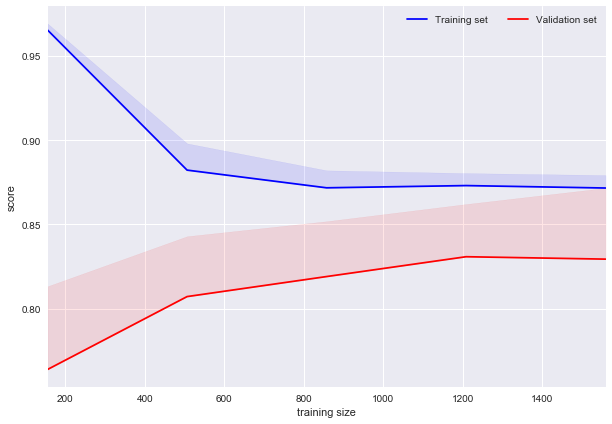

In [77]:
plot_learning_curve(lr,Xtrain,Ytrain)

In [78]:
predictions = lr.predict(Xtest)
print('The accuracy of the test-set is:',round(metrics.accuracy_score(Ytest,predictions)*100, 2))

The accuracy of the test-set is: 86.98


[[136   5]
 [ 20  31]]


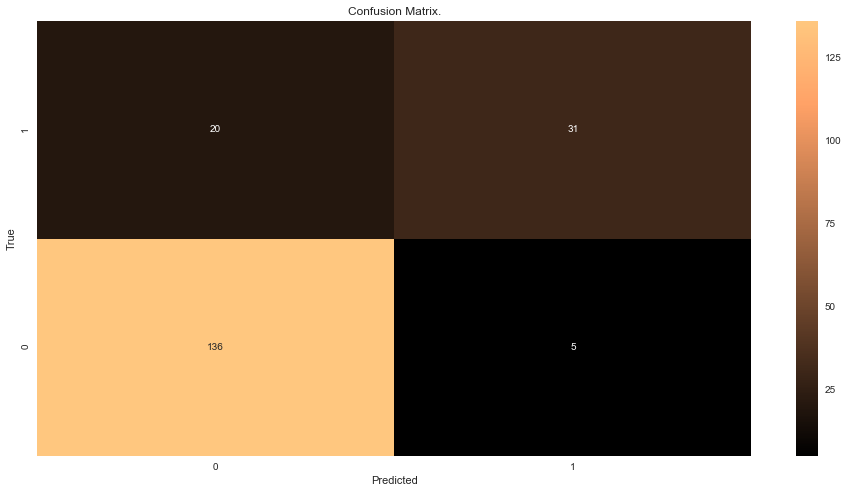


               precision    recall  f1-score   support

           0       0.87      0.96      0.92       141
           1       0.86      0.61      0.71        51

    accuracy                           0.87       192
   macro avg       0.87      0.79      0.81       192
weighted avg       0.87      0.87      0.86       192



In [79]:
plot_confusion_matrix_with_report(Ytest, predictions)

In [80]:
def feature_plot(imp, Xcols=None):
    global Xtrain;
    if Xcols == None:
        fimp = pd.DataFrame({'Feature': Xtrain.columns, 'Importance' : np.round(imp)})
    else:
        fimp = pd.DataFrame({'Feature': Xcols, 'Importance' : np.round(imp)})
    
    fimp =fimp.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(10,10))
    plt.plot(fimp['Feature'], fimp['Importance'])
    plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 

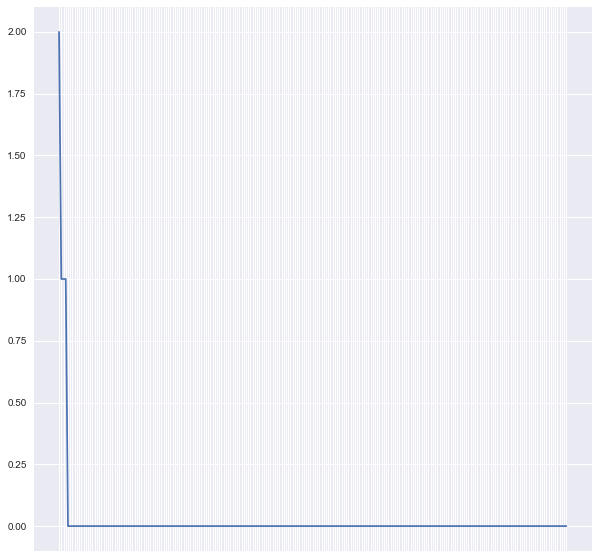

In [81]:
feature_plot(lr.coef_[0])

In [82]:
fimp_lr = pd.DataFrame({'Feature': Xtrain.columns, 'Importance' : np.round(lr.coef_[0])})
fimp_lr =fimp_lr.sort_values(by='Importance', ascending=False)
fimp_lr

,Feature,Importance
225,RESPIRATORY_RATE_DIFF_REL,2.0
228,WINDOW,1.0
195,RESPIRATORY_RATE_MEAN,1.0
199,BLOODPRESSURE_SISTOLIC_MEDIAN,1.0
155,SAT02_ARTERIAL_MAX,0.0
145,PLATELETS_MAX,0.0
146,PLATELETS_DIFF,0.0
147,POTASSIUM_MEDIAN,0.0
148,POTASSIUM_MEAN,0.0
149,POTASSIUM_MIN,0.0


# Feature Selection:
- Removing Unimportant Features and Refitting.
- Plot Confusion Matrix
- Precision, Recall, F1-Score

Accuracy: 85.68
Accuracy of CV: 85.18
The accuracy of the test-set is: 89.58
[[67  3]
 [ 7 19]]


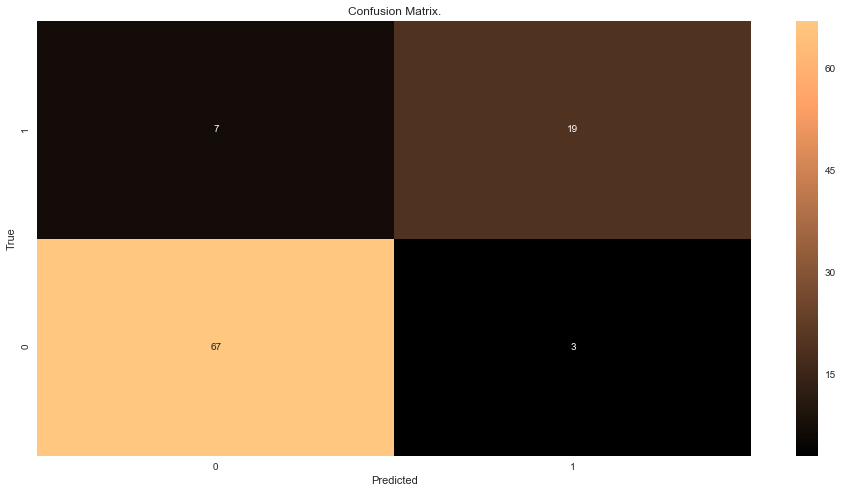


               precision    recall  f1-score   support

           0       0.91      0.96      0.93        70
           1       0.86      0.73      0.79        26

    accuracy                           0.90        96
   macro avg       0.88      0.84      0.86        96
weighted avg       0.89      0.90      0.89        96


DONE



array([False, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [83]:
select_features_threshold(lr,data)

# Decision Trees

In [84]:
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()
dt = fit_algo(DecisionTreeClassifier(random_state = 1)
                                        , Xtrain, Ytrain, 10)

dt_time = (time.time() - start_time)
print("Execution time: %s" % dt_time)

Accuracy: 99.02
Accuracy of CV: 78.94
Execution time: 0.2134382724761963


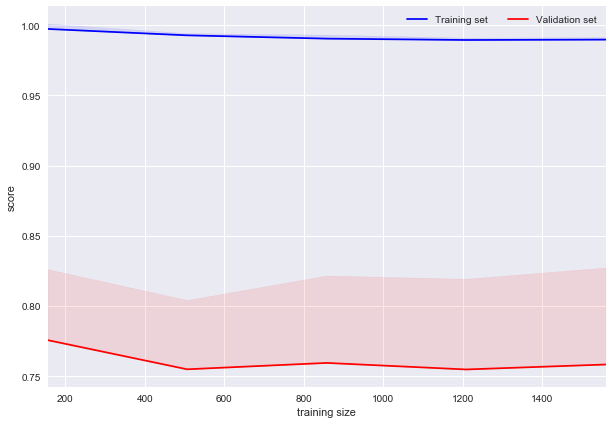

In [85]:
plot_learning_curve(dt,Xtrain,Ytrain)

**We won't go any furthur, DTs are usually not that great in general.**

# Random Forest (Gini)

In [89]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
rf = fit_algo(RandomForestClassifier(n_estimators = 100)
                                        , Xtrain, Ytrain, 10)

rf_time = (time.time() - start_time)
print("Execution time: %s" % rf_time)

Accuracy: 99.02
Accuracy of CV: 87.02
Execution time: 1.0741257667541504


In [90]:
predictions = rf.predict(Xtest)
print('The accuracy of the test-set is:',round(metrics.accuracy_score(Ytest,predictions)*100, 2))

The accuracy of the test-set is: 87.5


[[133   8]
 [ 16  35]]


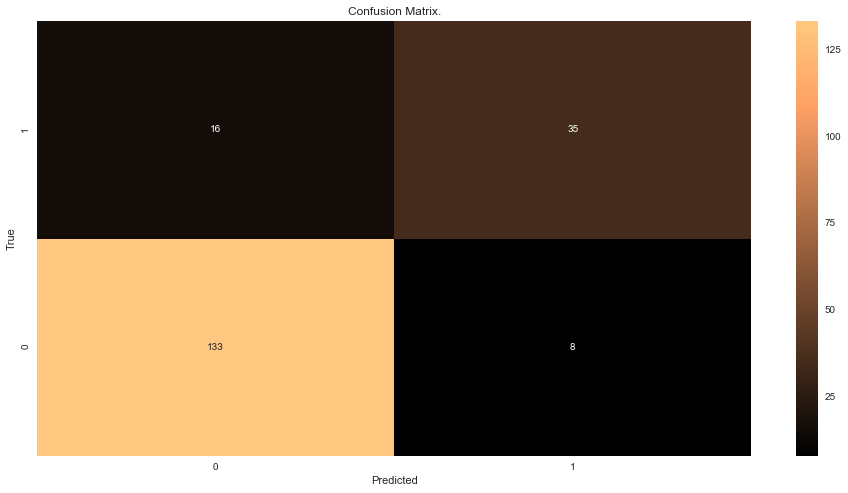


               precision    recall  f1-score   support

           0       0.89      0.94      0.92       141
           1       0.81      0.69      0.74        51

    accuracy                           0.88       192
   macro avg       0.85      0.81      0.83       192
weighted avg       0.87      0.88      0.87       192



In [91]:
plot_confusion_matrix_with_report(Ytest, predictions)

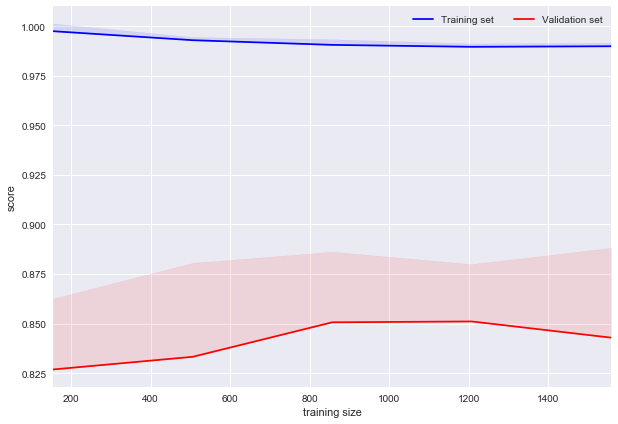

In [92]:
plot_learning_curve(rf,Xtrain,Ytrain)

**High Variance, can be solved by Feature Selection**

Accuracy: 98.96
Accuracy of CV: 86.39
The accuracy of the test-set is: 90.62
[[67  3]
 [ 6 20]]


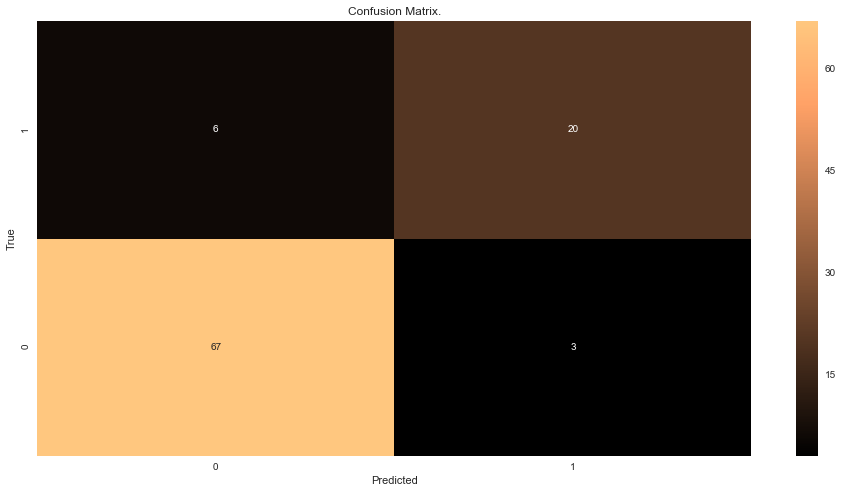


               precision    recall  f1-score   support

           0       0.92      0.96      0.94        70
           1       0.87      0.77      0.82        26

    accuracy                           0.91        96
   macro avg       0.89      0.86      0.88        96
weighted avg       0.90      0.91      0.90        96


DONE



array([ True,  True,  True, False,  True, False, False,  True, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [93]:
select_features_threshold(rf,data)

# Gradient Boosting

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
start_time = time.time()

gbt= fit_algo(GradientBoostingClassifier() , Xtrain, Ytrain, 10)

gbt_time = (time.time() - start_time)

print("Execution time: %s" % gbt_time)

Accuracy: 94.69
Accuracy of CV: 87.54
Execution time: 4.038165092468262


In [95]:
predictions = gbt.predict(Xtest)
print('The accuracy of the test-set is:',round(metrics.accuracy_score(Ytest,predictions)*100, 2))

The accuracy of the test-set is: 89.06


[[136   5]
 [ 16  35]]


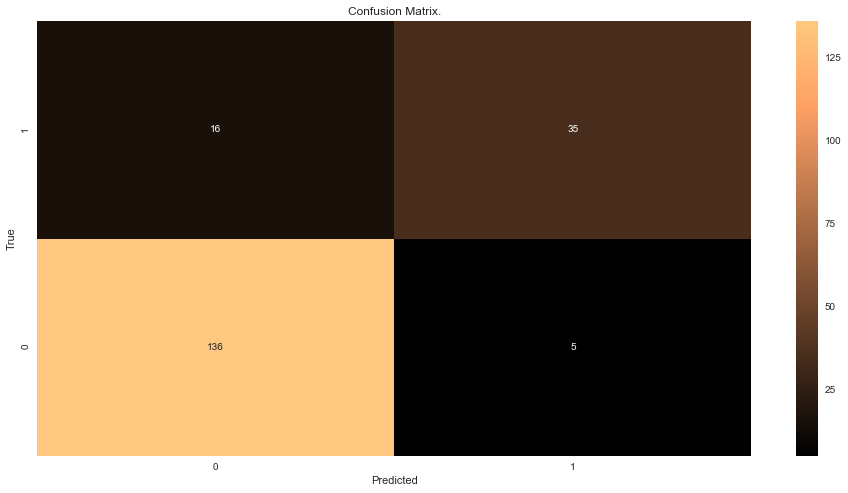


               precision    recall  f1-score   support

           0       0.89      0.96      0.93       141
           1       0.88      0.69      0.77        51

    accuracy                           0.89       192
   macro avg       0.88      0.83      0.85       192
weighted avg       0.89      0.89      0.89       192



In [96]:
plot_confusion_matrix_with_report(Ytest, predictions)

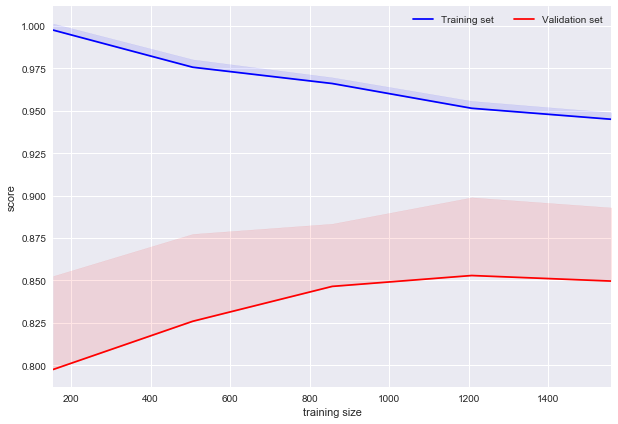

In [97]:
plot_learning_curve(gbt,Xtrain,Ytrain)

Accuracy: 93.99
Accuracy of CV: 87.64
The accuracy of the test-set is: 91.67
[[67  3]
 [ 5 21]]


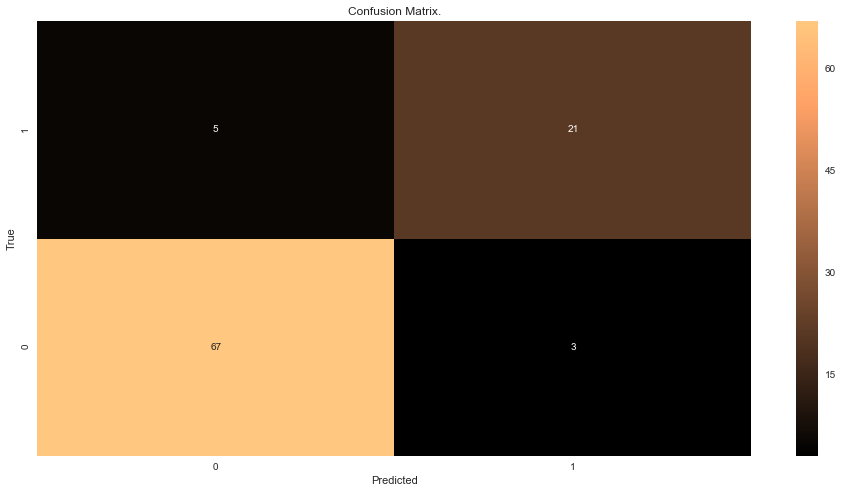


               precision    recall  f1-score   support

           0       0.93      0.96      0.94        70
           1       0.88      0.81      0.84        26

    accuracy                           0.92        96
   macro avg       0.90      0.88      0.89        96
weighted avg       0.92      0.92      0.92        96


DONE



In [98]:
features = select_features_threshold(gbt,data)

In [100]:
cols = Xtrain.columns
features.shape
cols_fs = []
for f,c in zip(features, cols):
    if(f==True):
        cols_fs.append(c)
    else:
        pass

In [101]:
fimp_gbt = pd.DataFrame({'Feature': cols_fs, 'Importance' : gbt.feature_importances_})
fimp_gbt =fimp_gbt.sort_values(by='Importance', ascending=False)
fimp_gbt

,Feature,Importance
22,RESPIRATORY_RATE_MAX,0.455919
15,BLOODPRESSURE_DIASTOLIC_MIN,0.068154
13,RESPIRATORY_RATE_MEDIAN,0.060906
11,BLOODPRESSURE_DIASTOLIC_MEDIAN,0.040755
8,RESPIRATORY_RATE_MEAN,0.034804
12,BLOODPRESSURE_SISTOLIC_MEDIAN,0.032602
0,AGE_PERCENTIL,0.027674
26,WINDOW,0.024861
20,BLOODPRESSURE_SISTOLIC_MAX,0.023431
3,OTHER,0.021954


# XGBOOST

In [102]:
start_time = time.time()

xgb= fit_algo(XGBClassifier(random_state=37) , Xtrain, Ytrain, 10)

xgb_time = (time.time() - start_time)
print("Execution time: %s" % xgb_time)

Accuracy: 98.21
Accuracy of CV: 87.54
Execution time: 3.708050489425659


In [103]:
predictions = xgb.predict(Xtest)
print('The accuracy of the test-set is:',round(metrics.accuracy_score(Ytest,predictions)*100, 2))

The accuracy of the test-set is: 88.02


[[134   7]
 [ 16  35]]


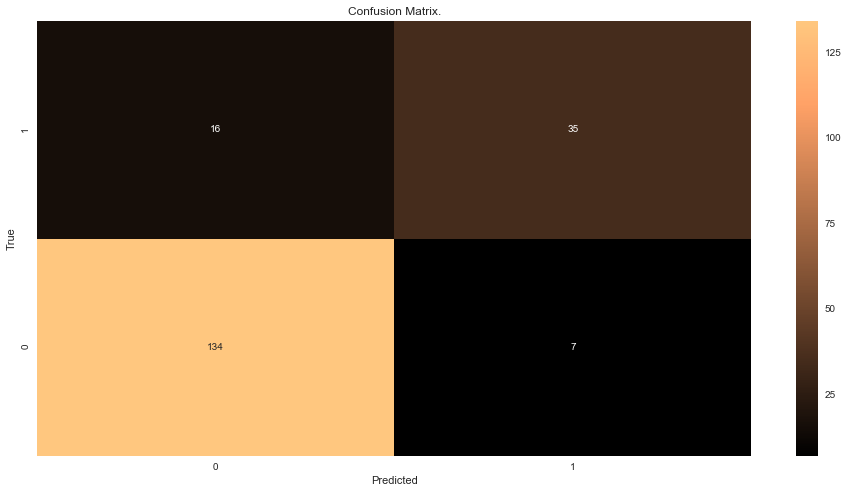


               precision    recall  f1-score   support

           0       0.89      0.95      0.92       141
           1       0.83      0.69      0.75        51

    accuracy                           0.88       192
   macro avg       0.86      0.82      0.84       192
weighted avg       0.88      0.88      0.88       192



In [104]:
plot_confusion_matrix_with_report(Ytest, predictions)

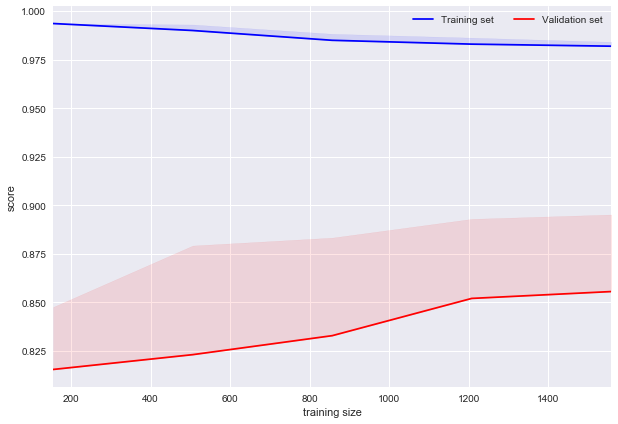

In [105]:
plot_learning_curve(xgb,Xtrain,Ytrain)

Accuracy: 98.31
Accuracy of CV: 86.88
The accuracy of the test-set is: 90.62
[[65  5]
 [ 4 22]]


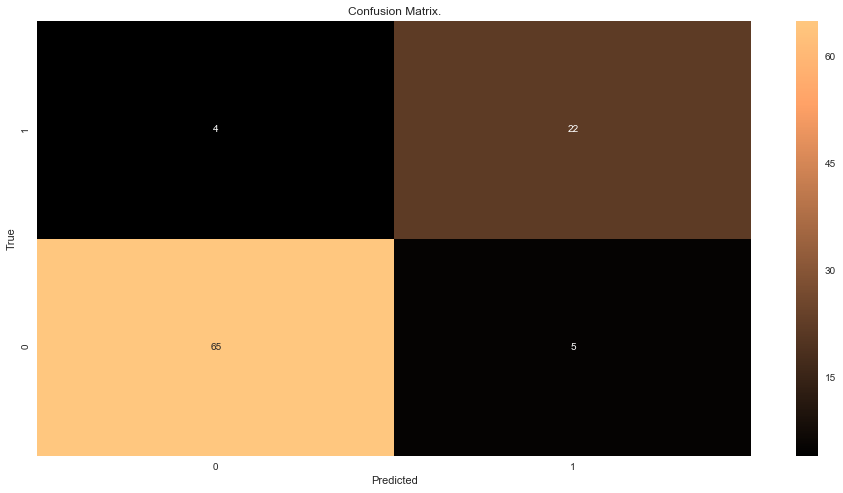


               precision    recall  f1-score   support

           0       0.94      0.93      0.94        70
           1       0.81      0.85      0.83        26

    accuracy                           0.91        96
   macro avg       0.88      0.89      0.88        96
weighted avg       0.91      0.91      0.91        96


DONE



In [106]:
features = select_features_threshold(xgb,data)

# Bayesian Optimization:
For later purposes.

In [65]:
#predictions_proba = xgb.predict_proba(Xtest)[:,1]

In [66]:
#def objective(params):
#    global predictions_proba;
#    global Ytest;
#    return -average_precision_score(Ytest, predictions_proba)

In [67]:
#from hyperopt import hp, fmin, Trials, tpe

#spaces_xgboost = {'n_estimators': hp.randint('n_estimators', 1200),
#        'learning_rate': hp.loguniform('learning_rate', 1e-5, 1e-1),
#          'max_depth': hp.randint('max_depth', 30),
#          'min_child_weight': hp.uniform('min_child_weight', 0,20),
#          'reg_lambda': hp.uniform('reg_lambda', 0.001, 3),
#          'reg_alpha': hp.uniform('reg_alpha', 0.001, 3),
#          'gamma': hp.uniform('gamma', 0,10),
#          'max_delta_step': hp.uniform('max_delta_step', 0, 10),
#          'max_leaves': hp.randint('max_leaves', 30),
#          'colsample_bytree': hp.uniform('colsample_bytree', 0.1,1.0),
#          'colsample_bylevel': hp.uniform('colsample_bylevel', 0.1, 1.0),
#          'scale_pos_weight': hp.randint('scale_pos_weight', 10)}
#
#trials = Trials()
#xgboost_tuning = fmin(fn= objective, space = spaces_xgboost, algo=tpe.suggest, max_evals=100, trials=trials, verbose=1)
#xgboost_tuning

In [68]:
filename = 'gbt_covid_icu.sav'
pickle.dump(rf2, open(filename, 'wb'))

NameError: name 'rf2' is not defined